In [1]:
# Exploratory Data Analysis (EDA) for a Single Driver Dataset

# Import necessary libraries for data analysis and visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
%matplotlib inline

In [2]:
# Set the working directory (update this path based on your machine or environment)
# %cd /path/to/your/data/folder

# IMPORTANT: Ensure the correct path is set before running this cell.
# Aggregating data from multiple CSV files (replace with your actual file names).

# Placeholder list of file paths (replace with your actual file paths)
file_paths = [
    'file_1.csv', 'file_2.csv', 'file_3.csv',
    'file_4.csv', 'file_5.csv', 'file_6.csv',
    'file_7.csv', 'file_8.csv', 'file_9.csv',
    'file_10.csv', 'file_11.csv', 'file_12.csv'
]

# Load each CSV file into a DataFrame and aggregate them
data_frames = [pd.read_csv(file_path) for file_path in file_paths]
aggregated_data = pd.concat(data_frames, ignore_index=True)

# Display a summary of the aggregated data (uncomment if needed)
# print(aggregated_data.describe())


/home/turing/Desktop/Project_VTTI/unknown_restructured/142478


In [3]:
# Set the working directory (update this path based on your environment)
# %cd /path/to/your/identified/data/folder

# Load identified trips (replace with your actual file names)
# Aggregating data from 3 identified (alcohol-influenced) trips

identified_files = ['identified_trip_1.csv', 'identified_trip_2.csv', 'identified_trip_3.csv']

# Read each CSV file and aggregate them into a single DataFrame
identified_data_frames = [pd.read_csv(file) for file in identified_files]
identified_data = pd.concat(identified_data_frames, ignore_index=True)

# Display a summary of the aggregated identified data (uncomment if needed)
# print(identified_data.describe())


/home/turing/Desktop/Project_VTTI/Identified_restructured/142478


In [5]:
# Generate descriptive statistics for both identified and unknown datasets
identified_stats = identified_data.describe()
unknown_stats = aggregated_data.describe()
# Combine the statistics for side-by-side comparison
stats_comparison = pd.concat([identified_stats, unknown_stats], axis=1, keys=['Identified', 'Unknown'])
# Set the display option to show all columns for the comparison
pd.set_option('display.max_columns', None)
# Display the full comparison (uncomment to view)
# print(stats_comparison)


In [6]:
# Define the list of kinematic columns for comparison
kinematic_columns = [
    'vtti.accel_x', 'vtti.accel_y', 'vtti.accel_z',
    'vtti.gyro_x', 'vtti.gyro_y', 'vtti.gyro_z',
    'vtti.speed_gps'
]
# Extract kinematic statistics for identified and unknown datasets
identified_kinematics = identified_stats[kinematic_columns]
unknown_kinematics = unknown_stats[kinematic_columns]
# Combine the statistics for a side-by-side comparison
comp_kinematics = pd.concat([identified_kinematics, unknown_kinematics], axis=1, keys=['Identified', 'Unknown'])
# Set display option to show all columns and print the comparison
pd.set_option('display.max_columns', None)
print(comp_kinematics)


         Identified                                                          \
       vtti.accel_x  vtti.accel_y  vtti.accel_z   vtti.gyro_x   vtti.gyro_y   
count  36547.000000  36547.000000  36547.000000  36546.000000  36546.000000   
mean       0.009755     -0.001723     -0.980064     -0.113853     -0.196811   
std        0.077990      0.085606      0.027811      0.992169      0.979055   
min       -0.785900     -0.803300     -1.499300    -13.007812    -12.032227   
25%       -0.023200     -0.026100     -0.988900     -0.650391     -0.650391   
50%        0.005800     -0.002900     -0.980200      0.000000      0.000000   
75%        0.049300      0.023200     -0.968600      0.325195      0.000000   
max        0.382800      0.835200     -0.678600     19.836914     19.186523   

                                          Unknown                 \
        vtti.gyro_z vtti.speed_gps   vtti.accel_x   vtti.accel_y   
count  36546.000000    3604.000000  248944.000000  248944.000000   
mean 

In [7]:
# Compare Lane Data between Identified and Unknown datasets
lane_columns = [
    'vtti.lane_distance_off_center', 'vtti.lane_width',
    'vtti.left_marker_probability', 'vtti.left_marker_type'
]
# Extract lane-related statistics for both datasets
identified_lanes = identified_stats[lane_columns]
unknown_lanes = unknown_stats[lane_columns]
# Side-by-side comparison of lane data
comp_lanes = pd.concat([identified_lanes, unknown_lanes], axis=1, keys=['Identified', 'Unknown'])
# Display the full comparison (thanks to Pandas magic)
pd.set_option('display.max_columns', None)
print(comp_lanes)


                         Identified                  \
      vtti.lane_distance_off_center vtti.lane_width   
count                  36291.000000    36291.000000   
mean                      -2.836119      444.116788   
std                      145.336580      255.869593   
min                     -687.171875        0.000000   
25%                      -57.844629      335.787929   
50%                      -26.941332      365.759985   
75%                       25.132489      390.143953   
max                      946.555273     2143.250781   

                                                          \
      vtti.left_marker_probability vtti.left_marker_type   
count                 36291.000000          36291.000000   
mean                    568.927220              2.189882   
std                     452.795977              1.158463   
min                       0.000000              0.000000   
25%                      35.000000              1.000000   
50%                     718.3

In [8]:
# Compare Steering Wheel Position data
steering_columns = ['vtti.steering_wheel_position']
identified_steering = identified_stats[steering_columns]
unknown_steering = unknown_stats[steering_columns]
comp_steering = pd.concat([identified_steering, unknown_steering], axis=1, keys=['Identified', 'Unknown'])
pd.set_option('display.max_columns', None)
print(comp_steering)

                        Identified                      Unknown
      vtti.steering_wheel_position vtti.steering_wheel_position
count                 36394.000000                248339.000000
mean                    -12.654357                    -9.553627
std                      90.723862                    53.709570
min                    -469.000000                  -528.000000
25%                      -1.000000                    -6.000000
50%                       3.000000                     9.000000
75%                      10.000000                    10.600000
max                     465.000000                   462.000000


In [9]:
# Compare Pedal Data
pedal_columns = ['vtti.pedal_gas_position', 'vtti.pedal_brake_state']
identified_pedal = identified_stats[pedal_columns]
unknown_pedal = unknown_stats[pedal_columns]
comp_pedal = pd.concat([identified_pedal, unknown_pedal], axis=1, keys=['Identified', 'Unknown'])
pd.set_option('display.max_columns', None)
print(comp_pedal)

                   Identified                                        Unknown  \
      vtti.pedal_gas_position vtti.pedal_brake_state vtti.pedal_gas_position   
count            36394.000000           36394.000000           248337.000000   
mean                10.024847               0.307029                7.417765   
std                 12.141283               0.461268               10.287241   
min                  0.000000               0.000000                0.000000   
25%                  0.000000               0.000000                0.000000   
50%                  0.392157               0.000000                0.000000   
75%                 19.607800               1.000000               17.254900   
max                100.000000               1.000000               70.196098   

                              
      vtti.pedal_brake_state  
count           248338.00000  
mean                 0.13722  
std                  0.34408  
min                  0.00000  
25%          

In [10]:
# Adding new features using a modular function
# This set includes kinematic, pedal, and steering wheel features
def add_features(df):
    # Kinematic features
    df['accel_magnitude'] = np.sqrt(df['vtti.accel_x']**2 + df['vtti.accel_y']**2 + df['vtti.accel_z']**2)
    df['change_speed_network'] = df['vtti.speed_network'].diff()
    df['gyro_magnitude'] = np.sqrt(df['vtti.gyro_x']**2 + df['vtti.gyro_y']**2 + df['vtti.gyro_z']**2)
    df['lateral_accel_change'] = df['vtti.accel_y'].diff().abs()

    # Pedal features
    df['brake_gas_interaction'] = np.where((df['vtti.pedal_brake_state'] == 1) & (df['vtti.pedal_gas_position'] > 0), 1, 0)
    df['delta_gas_pedal'] = df['vtti.pedal_gas_position'].diff()
    df['pedal_rate'] = df['delta_gas_pedal'].diff()

    # Steering wheel features
    df['steering_change'] = df['vtti.steering_wheel_position'].diff()
    df['steering_rate'] = df['steering_change'].diff()
    df['abs_steering_rate'] = df['steering_rate'].abs()
    df['steering_wheel_reversion'] = np.where(df['steering_rate'] * df['steering_rate'].shift(-1) < 0, 1, 0)

    return df
# Apply the feature engineering function to both datasets
identified_features = add_features(identified_data)
unknown_features = add_features(aggregated_data)



In [11]:
# Generate statistics for the new feature-engineered datasets
identified_features_stats = identified_features.describe()
unknown_features_stats = unknown_features.describe()
# Compare kinematic features' basic statistics
kinematic_features = ['accel_magnitude', 'change_speed_network', 'gyro_magnitude', 'lateral_accel_change']
identified_kinematic_features = identified_features_stats[kinematic_features]
unknown_kinematic_features = unknown_features_stats[kinematic_features]
# Side-by-side comparison of kinematic features
comp_kinematic_features = pd.concat([identified_kinematic_features, unknown_kinematic_features], axis=1, keys=['Identified', 'Unknown'])
# Set display options to show all columns (uncomment print statement if needed)
pd.set_option('display.max_columns', None)
# print(comp_kinematic_features)


In [12]:
# Placeholder for comparing Lane Features (feature engineering still in progress)
# Uncomment and modify when lane features like 'weaving' are fully implemented
"""
lane_features = ['weaving', 'weaving_pattern']
identified_lane_features = identified_features_stats[lane_features]
unknown_lane_features = unknown_features_stats[lane_features]
comp_lane_features = pd.concat([identified_lane_features, unknown_lane_features], axis=1, keys=['Identified', 'Unknown'])
pd.set_option('display.max_columns', None)
print(comp_lane_features)
"""

"\ncols_features_lane = ['weaving', 'weaving_pattern']\nidentified_features_lane = identified_stats_features[cols_features_lane]\nunknown_features_lane = unknown_stats_features[cols_features_lane]\npd.set_option('display.max_columns',None)\ncomp_features_lane = pd.concat([identified_features_lane,unknown_features_lane], axis = 1, keys = ['Identified','Unknown'])\nprint(comp_features_lane) "

In [13]:
# Compare Pedal Features' basic statistics
pedal_features = ['brake_gas_interaction', 'delta_gas_pedal', 'pedal_rate']
# Extract statistics for pedal features
identified_pedal_features = identified_features_stats[pedal_features]
unknown_pedal_features = unknown_features_stats[pedal_features]
# Side-by-side comparison of pedal features
comp_pedal_features = pd.concat([identified_pedal_features, unknown_pedal_features], axis=1, keys=['Identified', 'Unknown'])
pd.set_option('display.max_columns', None)
print(comp_pedal_features)

                 Identified                                \
      brake_gas_interaction delta_gas_pedal    pedal_rate   
count          36547.000000    36391.000000  3.638800e+04   
mean               0.004652       -0.000248 -2.257791e-19   
std                0.068044        1.173552  1.122096e+00   
min                0.000000      -78.509815 -5.733336e+01   
25%                0.000000        0.000000  0.000000e+00   
50%                0.000000        0.000000  0.000000e+00   
75%                0.000000        0.000000  0.000000e+00   
max                1.000000       62.980407  7.819609e+01   

                    Unknown                                 
      brake_gas_interaction delta_gas_pedal     pedal_rate  
count         248946.000000   248325.000000  248313.000000  
mean               0.007958       -0.000333       0.000034  
std                0.088850        0.610453       0.489532  
min                0.000000      -21.607849     -26.431400  
25%                0.00

In [14]:
# Compare Steering Wheel Position Features
steering_features = ['steering_change', 'steering_rate', 'abs_steering_rate', 'steering_wheel_reversion']
# Extract statistics for steering features
identified_steering_features = identified_features_stats[steering_features]
unknown_steering_features = unknown_features_stats[steering_features]
# Side-by-side comparison of steering features
comp_steering_features = pd.concat([identified_steering_features, unknown_steering_features], axis=1, keys=['Identified', 'Unknown'])
pd.set_option('display.max_columns', None)
print(comp_steering_features)

           Identified                                  \
      steering_change steering_rate abs_steering_rate   
count    36391.000000  3.638800e+04      36388.000000   
mean         0.001085 -2.335935e-04          0.540742   
std          3.655595  1.301116e+00          1.183424   
min        -73.600000 -3.460000e+01          0.000000   
25%          0.000000  0.000000e+00          0.000000   
50%          0.000000  0.000000e+00          0.000000   
75%          0.000000  4.440892e-16          0.800000   
max         64.000000  3.260000e+01         34.600000   

                                       Unknown                 \
      steering_wheel_reversion steering_change  steering_rate   
count             36547.000000   248327.000000  248315.000000   
mean                  0.193860        0.002797       0.000150   
std                   0.395326        2.296675       0.788637   
min                   0.000000      -84.000000     -28.200000   
25%                   0.000000        0

In [10]:
# New and improved features for the rest of the analysis
def new_features(df):
    window_size_steering = 10 * 1000  # 10-second window for steering features
    window_size_distance = 1 * 1000   # 1-second window for lane distance features

    # Steering Angle Features
    df['steering_stability'] = df['vtti.steering_wheel_position'].rolling(window=window_size_steering).std()

    # Lateral Position Features
    df['lateral_velocity'] = df['vtti.lane_distance_off_center'].diff()
    df['lateral_acceleration'] = df['lateral_velocity'].diff()
    df['avg_abs_distance_from_center'] = df['vtti.lane_distance_off_center'].abs().rolling(window=window_size_distance).mean()

    # Pedal Brake State Features
    df['brake_duration'] = df.groupby((df['vtti.pedal_brake_state'] != df['vtti.pedal_brake_state'].shift()).cumsum()).cumcount() * df['vtti.pedal_brake_state']
    df['brake_event'] = df['vtti.pedal_brake_state'].diff().apply(lambda x: 1 if x == 1 else 0)  # Detect brake events
    df['brake_frequency'] = df['brake_event'].rolling(window=window_size_steering).sum()

    return df
# Apply the new feature engineering function to both datasets
identified_features_new = new_features(identified_data)
unknown_features_new = new_features(aggregated_data)
# Generate descriptive statistics for the new feature sets
identified_stats_new_features = identified_features_new.describe()
unknown_stats_new_features = unknown_features_new.describe()

In [17]:
# Compare the new feature set's basic statistics
new_features_columns = [
    'steering_stability', 'lateral_velocity', 'lateral_acceleration',
    'avg_abs_distance_from_center', 'brake_duration', 'brake_frequency'
]
# Extract statistics for the new features
identified_new_features_stats = identified_stats_new_features[new_features_columns]
unknown_new_features_stats = unknown_stats_new_features[new_features_columns]
# Side-by-side comparison of the new features
comp_new_features = pd.concat([identified_new_features_stats, unknown_new_features_stats], axis=1, keys=['Identified', 'Unknown'])
pd.set_option('display.max_columns', None)
print(comp_new_features)

              Identified                                        \
      steering_stability lateral_velocity lateral_acceleration   
count        7595.000000     36051.000000         35850.000000   
mean           50.178396         0.042681            -0.011903   
std            36.327557        58.950177            86.561901   
min             9.688011      -947.927417         -1484.967788   
25%            16.155822        -2.285997            -3.132667   
50%            41.925206         0.000000             0.000000   
75%            92.035002         2.352928             2.963294   
max           114.924633      1075.858719          1597.828524   

                                                                   \
      avg_abs_distance_from_center brake_duration brake_frequency   
count                 15168.000000   36394.000000    26548.000000   
mean                     51.063687      64.243502       29.541773   
std                      14.135237     177.453828       10.0898

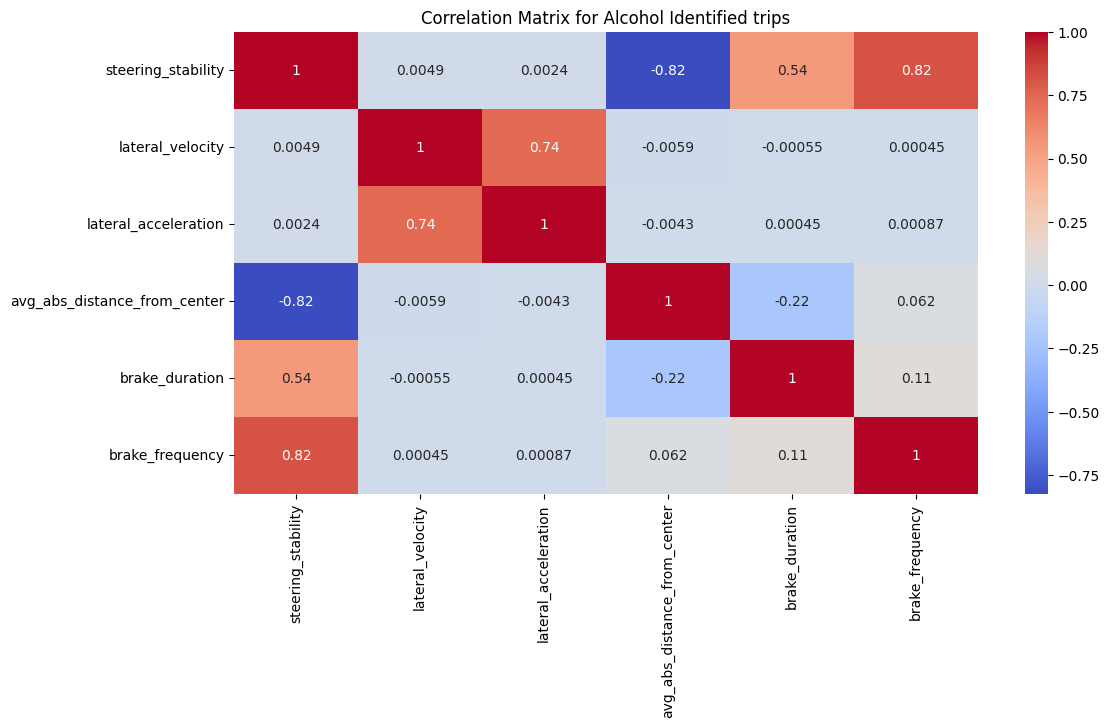

In [11]:
# Calculate the correlation matrix for the new features in the identified dataset
correlation_matrix_identified = identified_features_new[
    ['steering_stability', 'lateral_velocity', 'lateral_acceleration',
     'avg_abs_distance_from_center', 'brake_duration', 'brake_frequency']
].corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix_identified, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for Identified (Alcohol-Influenced) Trips")
plt.show()


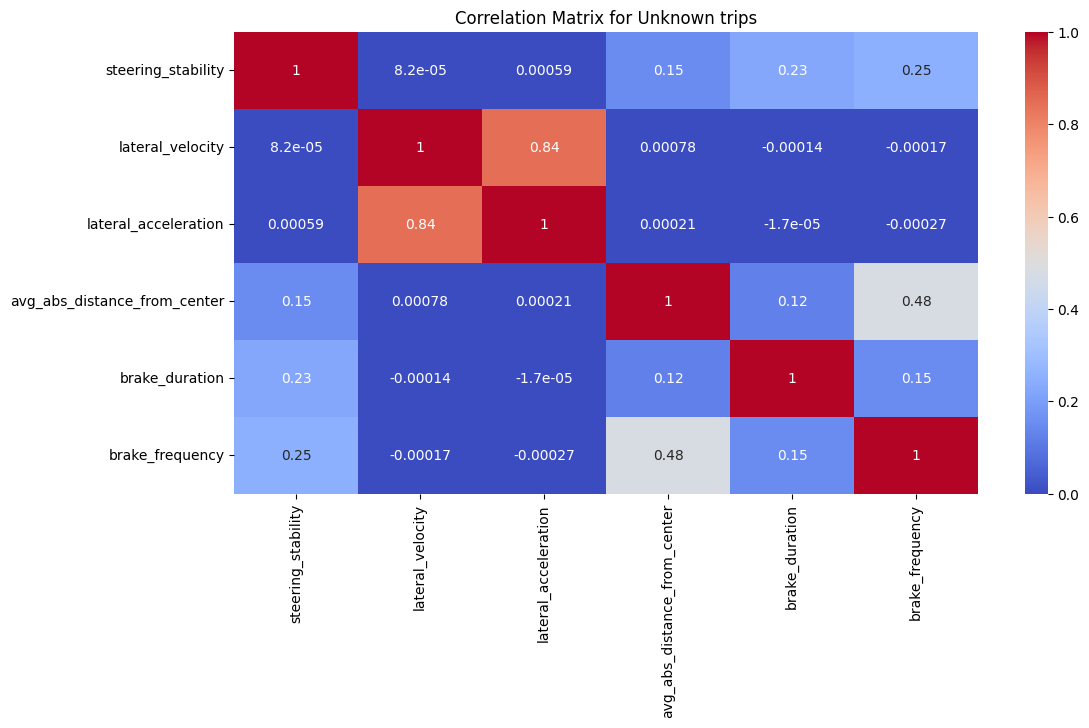

In [12]:
# Calculate the correlation matrix for the new features in the unknown dataset
correlation_matrix_unknown = unknown_features_new[
    ['steering_stability', 'lateral_velocity', 'lateral_acceleration',
     'avg_abs_distance_from_center', 'brake_duration', 'brake_frequency']
].corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix_unknown, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for Unknown Trips")
plt.show()